# Exploring Technology Company Layoffs (2022-2023)
By: Nadya Malekpour

*Fall 2023*

---



In [ ]:
pip install pandas matplotlib seaborn




---

***Let's do some typical initial steps in the exploratory data analysis  process.  Like loading the dataset, examining the first few rows before diving into more in-depth analysis and visualization.***


---



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Load the dataset
df = pd.read_csv("//content/technology-company-layoffs-2022-2023.csv")

# View the first few rows of the dataset
print(df.head(8))

          company total_layoffs impacted_workforce_percentage reported_date  \
0            C2FO            20                             2     12/9/2022   
1        VideoAmp       Unclear                             2     9/19/2022   
2        Amperity            13                             3     8/20/2022   
3         Addepar            20                             3     1/18/2023   
4  Thirty Madison            24                             3     5/13/2022   
5        NextRoll       Unclear                             3      7/8/2022   
6  Armis Security            25                             4     12/8/2022   
7         Foxtrot            26                             4     9/23/2022   

                        industry headquarter_location  \
0              Fintech, payments          Leawood, KS   
1          Advertising platforms          Los Angeles   
2                Saas, analytics              Seattle   
3        fintech, data analytics    Mountain View, CA   
4  



---

# Data Quality:



---



In [4]:
#  Checking for Missing Values

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

#  Calculating Missing Value Percentages

missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Value Percentages:\n", missing_percentage)

# Checking for Outliers (Z-Score Method)

z_threshold = 3

# Defining a function to detect outliers based on Z-scores

def detect_outliers_zscore(data, column, z_threshold):
    z_scores = np.abs(stats.zscore(data[column]))
    return z_scores > z_threshold

# Checking for outliers in numeric columns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_detected = {}
for column in numeric_columns:
    outliers = detect_outliers_zscore(df, column, z_threshold)
    outliers_detected[column] = outliers

print("\nOutliers Detected (Z-Score Method):\n", outliers_detected)

# I will display summary statistics to get an overview of the data
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Missing Values:
 company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

Missing Value Percentages:
 company                           0.000000
total_layoffs                     0.000000
impacted_workforce_percentage     0.000000
reported_date                     0.000000
industry                          0.000000
headquarter_location              0.000000
sources                           0.000000
status                            0.000000
additional_notes                 95.501022
dtype: float64

Outliers Detected (Z-Score Method):
 {}

Summary Statistics:
           company total_layoffs impacted_workforce_percentage reported_date  \
count         489           489                           489   



---


# Q:What is the distribution of total layoffs?

**When we look at the histogram below, we can see that data has a right skewed distribution.**

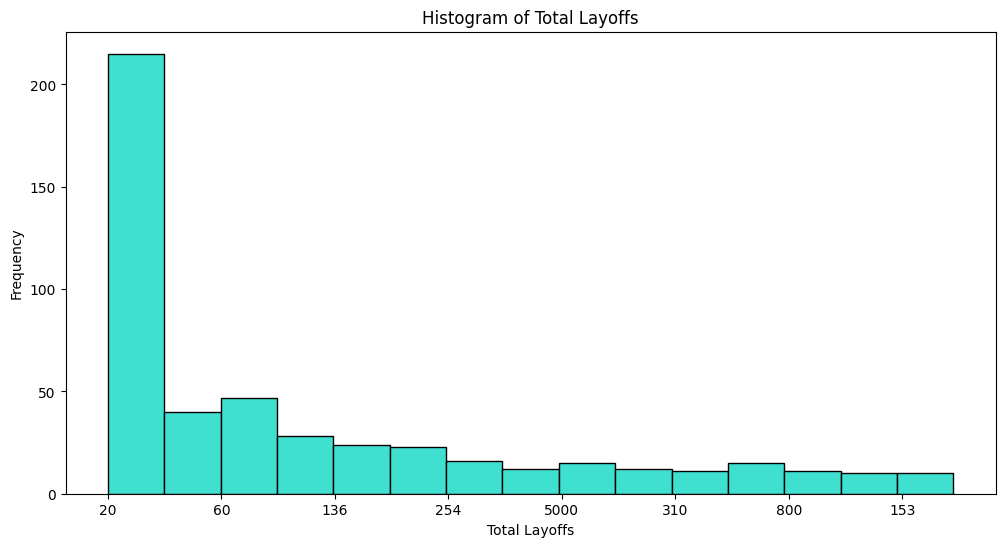

In [5]:

# Create a histogram of total layoffs
plt.figure(figsize=(12, 6))
plt.hist(df['total_layoffs'].dropna(), bins=15, color='turquoise', edgecolor='black')
plt.xlabel('Total Layoffs')
plt.ylabel('Frequency')
plt.title('Histogram of Total Layoffs')

# Automatically adjust x-axis ticks based on data range
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))

plt.show()





---


# Q: Is there a difference in the number of layoffs between public and private tech companies?

### "Private" companies layoffs are significantly more numerous than "public" companies layoffs.
---



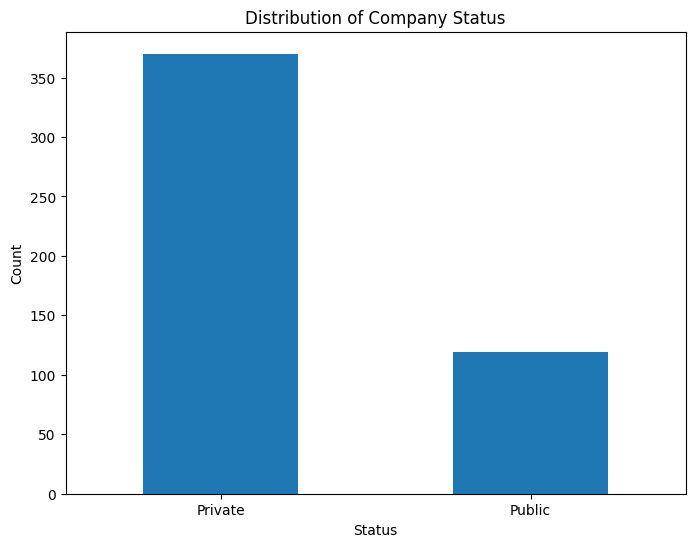

In [6]:

status_counts = df['status'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Company Status')
plt.xticks(rotation=0)
plt.show()



---
# Q: What are the major industries most affected by layoffs in the technology sector?

### It was observed that the healthcare sector had the highest number of layoffs. Furthermore, the Cyber security sector reported slighty more than half the number of layoffs compared to healthcare. Notably, the financial technology sector also had a number of layoffs, which was approximately less than half of the count in the Cyber Security sector. These findings highlight the variations in layoff activity across different sectors, with healthcare exhibiting the highest number, followed by Cyber security, financial technology sectors, Advertising and Marketing and E-commerce and Food in descending order."
---




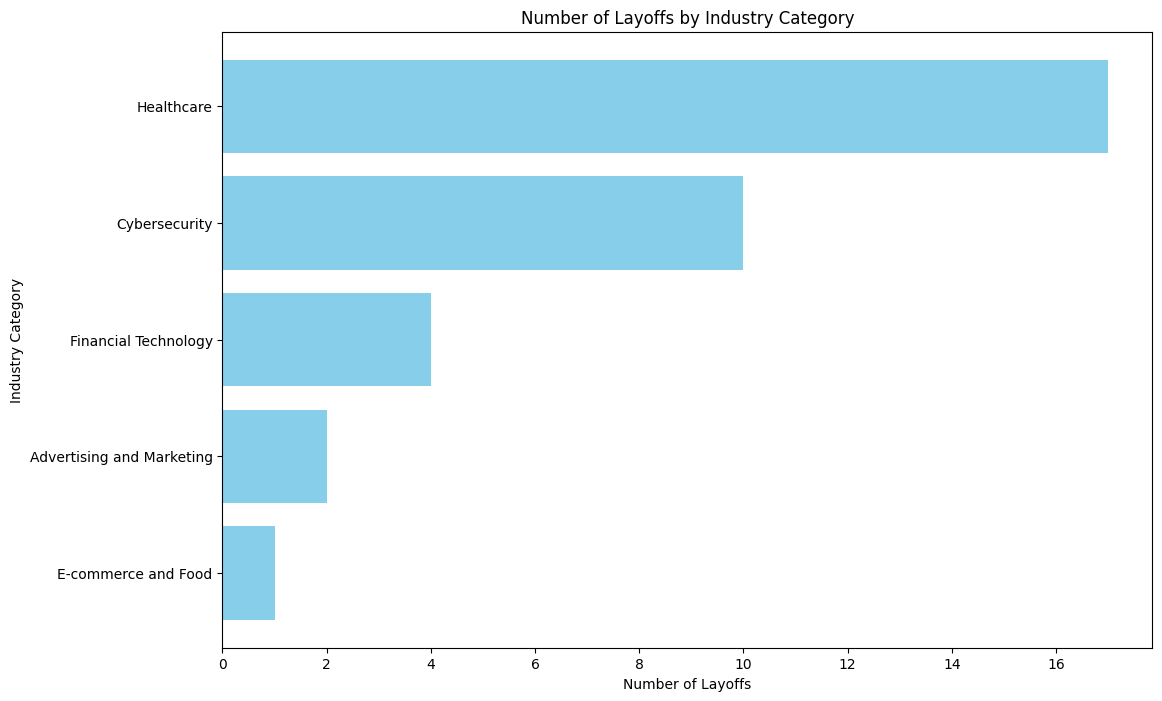

In [7]:
# Creating a dictionary to map specific industries to broader categories
industry_categories = {
    'Fintech, payments': 'Financial Technology',
    'Advertising platforms': 'Advertising and Marketing',
    'SaaS, analytics, Robotics, Artificial Intelligence ': 'Software and Analytics',
    'fintech, data analytics': 'Financial Technology',
    'Health Care': 'Healthcare',
    'Marketing Tech': 'Advertising and Marketing',
    'Cybersecurity': 'Cybersecurity',
    'video games, Media, Entertainment, Media/Entertainment, Digital media, journalism, streaming,Social Media, Audio, Content Creators, Music, eSports, Media,Virtual Event,Virtual Events, Sports,Video Conferencing Software':'Entertainment and Media',
    'food and beverage, e-commerce': 'E-commerce and Food'
}

# Maping industries to categories and counting the number of layoffs in each category
df['Industry Category'] = df['industry'].map(industry_categories)
category_layoffs = df['Industry Category'].value_counts().reset_index()
category_layoffs.columns = ['Category', 'Layoffs']

# Sorting the categories by the number of layoffs in descending order
category_layoffs = category_layoffs.sort_values(by='Layoffs', ascending=False)

# Creating a bar chart to visualize the number of layoffs by category
plt.figure(figsize=(12, 8))
plt.barh(category_layoffs['Category'], category_layoffs['Layoffs'], color='skyblue')
plt.xlabel('Number of Layoffs')
plt.ylabel('Industry Category')
plt.title('Number of Layoffs by Industry Category')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

---
Q: What are the distribution patterns of layoffs across different categorized locations?
---

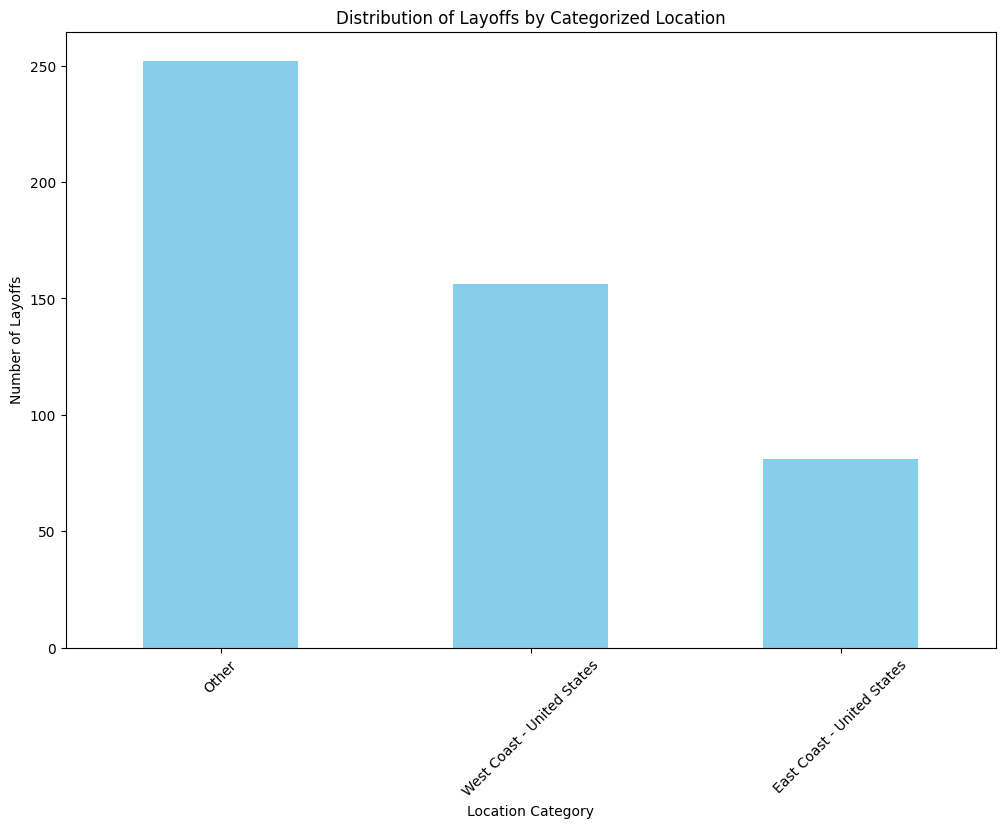

In [8]:
# Defining a function to categorize headquarters locations into broader regions
def categorize_location(location):
    location = str(location).lower()  # Convert to lowercase for consistent matching

    if 'new york' in location:
        return 'East Coast - United States'
    elif 'san francisco' in location:
        return 'West Coast - United States'
    elif 'los angeles' in location:
        return 'West Coast - United States'
    elif 'Boston' in location:
       return 'East Coast - United States'
    elif 'Chicago' in location:
       return 'East Coast - United States'
    elif 'Palo Alto' in location:
       return 'West Coast - United States'
    elif 'Mountain View' in location:
       return 'West Coast - United States'

    else:
        return 'Other'

# Creating a new column 'Location Category' by applying the categorization function
df['Location Category'] = df['headquarter_location'].apply(categorize_location)

# Creating a bar chart to show the distribution of layoffs by categorized location
plt.figure(figsize=(12, 8))
df['Location Category'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Location Category')
plt.ylabel('Number of Layoffs')
plt.title('Distribution of Layoffs by Categorized Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



---
# Q: What is the the distribution of layoffs by categorized location as a percentage?

The west coast has about double layoffs compared to the east coast.
---



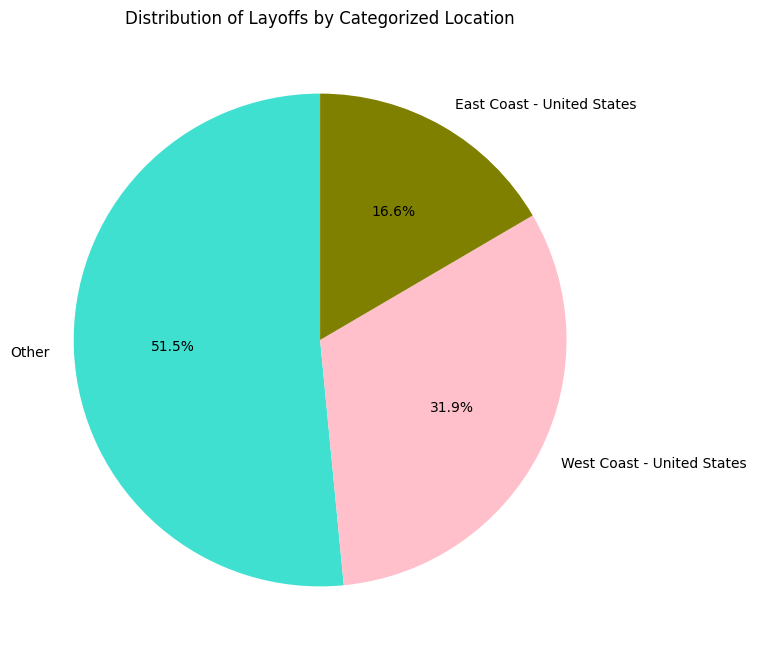

In [9]:
plt.figure(figsize=(8, 8))
df['Location Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90 , colors =['turquoise', 'pink', 'olive'])
plt.title('Distribution of Layoffs by Categorized Location')
plt.ylabel('')
plt.show()



---
# Q: Where are the major locations where tech companies have been experiencing the highest number of layoffs?

### As it is shown, there is a right skewed distribution. It means than the majority of layoffs happened in some specific locations(mostly in bay area).
---

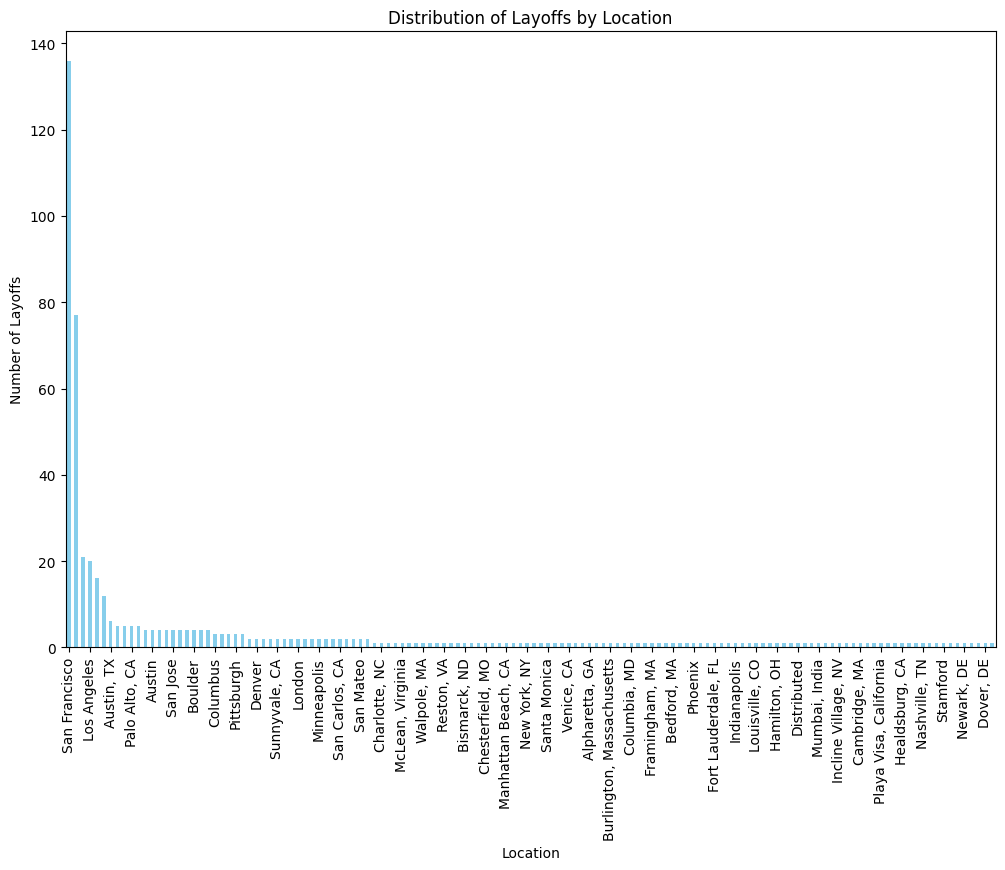

In [10]:

#  a bar plot of layoffs by location
plt.figure(figsize=(12, 8))
location_counts = df['headquarter_location'].value_counts()
location_counts.plot(kind='bar', color='skyblue')

# Set x-axis labels to display every n-th label
n = 3
locations = location_counts.index
plt.xticks(range(0, len(locations), n), locations[::n], rotation=90)

plt.xlabel('Location')
plt.ylabel('Number of Layoffs')
plt.title('Distribution of Layoffs by Location')
plt.show()



---
# Q: what are the 20 top locations with the most layoffs?

### The previous one is so busy then I would prefer to analyze the top 20 ones...
---

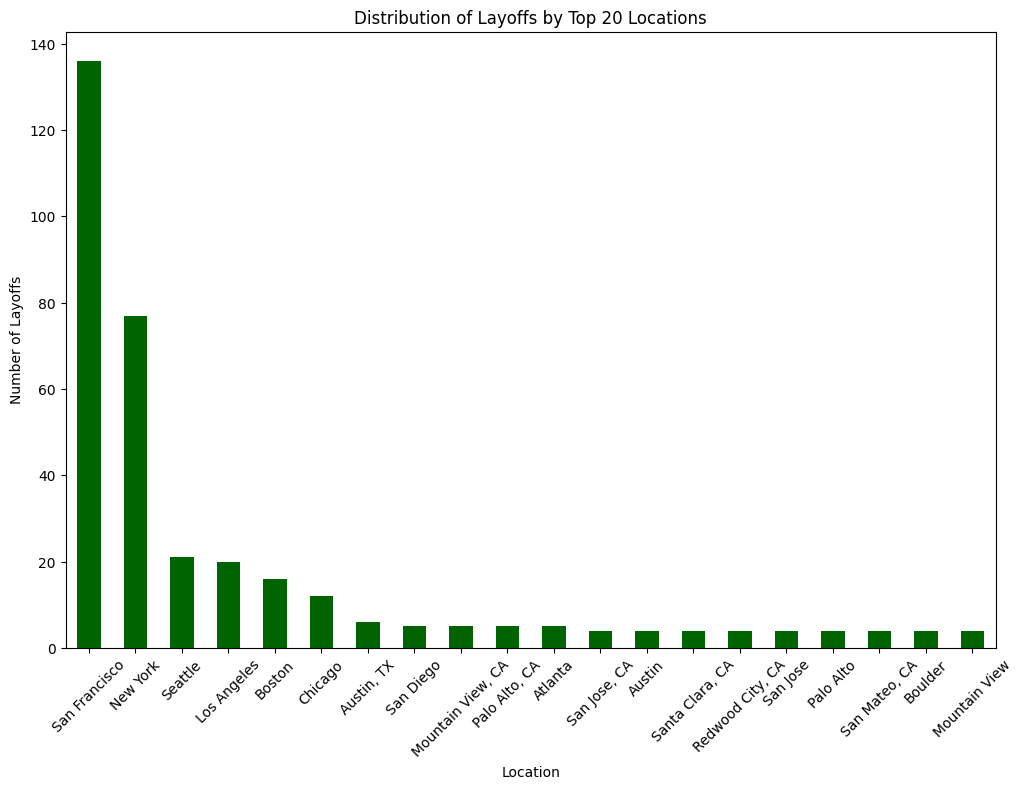

In [11]:
# Setting the number of top locations
top_n_locations = 20

# Getting the top  locations with the most layoffs
top_locations = df['headquarter_location'].value_counts().nlargest(top_n_locations)

# Creating a bar chart to show the distribution of layoffs for the top locations
plt.figure(figsize=(12, 8))
top_locations.plot(kind='bar', color='darkgreen')
plt.xlabel('Location')
plt.ylabel('Number of Layoffs')
plt.title(f'Distribution of Layoffs by Top {top_n_locations} Locations')
plt.xticks(rotation=45)
plt.show()



---
# Q: What is the trend of layoff during the time?

### As time passes, there are more layoffs. The data has a positive distribution.
---

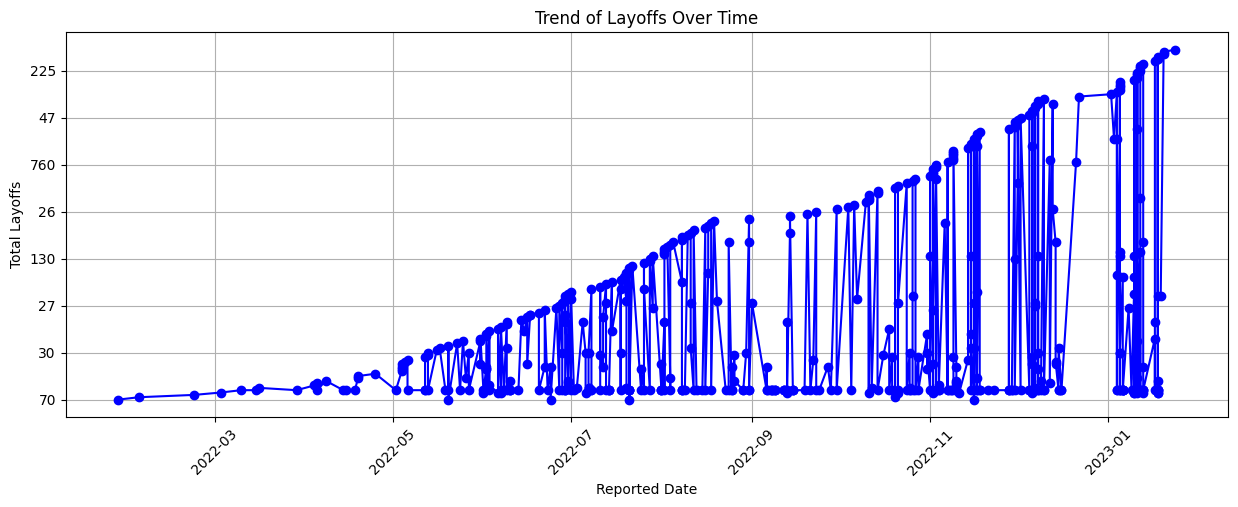

In [12]:

# Converting the 'reported_date' column to a datetime format
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Sorting the DataFrame by the 'reported_date' column
df = df.sort_values(by='reported_date')

# Creating a time series plot
plt.figure(figsize=(15, 5))
plt.plot(df['reported_date'], df['total_layoffs'], marker='o', linestyle='-', color='b')
plt.xlabel('Reported Date')
plt.ylabel('Total Layoffs')
plt.title('Trend of Layoffs Over Time')
plt.grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Automatically adjust y-axis ticks based on data range
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))

plt.show()


# In Conclusion, The layoffs in technology companies has a severe distribution. Over the time, the number of layoffs were gragually growing and also, in some locations, technology companies significantly had more layoffs.